In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer




import re, string, unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer





In [ ]:
# loading datasets
df_bt = pd.read_csv('/content/drive/MyDrive/Mirav/Batting data.csv')

In [ ]:
df_bt.head()

,id,Name,Matches,Runs,Bowls,Outs,Average,Performance Runs 5,Performance Runs 4,Performance Runs 3,Performance Runs 2,Performance Runs 1
0,1,Ali Connah,8,146,132,6,18,0,9,24,12,18
1,2,Rubina Jansik,6,50,164,5,8,0,10,0,1,21
2,3,Barret Penwright,6,48,167,5,8,17,24,0,14,14
3,4,Minna Darrigone,7,115,174,5,16,9,7,3,5,18
4,5,Lilly Cherrington,7,96,165,6,13,25,13,17,16,5


In [ ]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  600 non-null    int64 
 1   Name                600 non-null    object
 2   Matches             600 non-null    int64 
 3   Runs                600 non-null    int64 
 4   Bowls               600 non-null    int64 
 5   Outs                600 non-null    int64 
 6   Average             600 non-null    int64 
 7   Performance Runs 5  600 non-null    int64 
 8   Performance Runs 4  600 non-null    int64 
 9   Performance Runs 3  600 non-null    int64 
 10  Performance Runs 2  600 non-null    int64 
 11  Performance Runs 1  600 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 56.4+ KB


In [ ]:
df_bt.describe()

,id,Matches,Runs,Bowls,Outs,Average,Performance Runs 5,Performance Runs 4,Performance Runs 3,Performance Runs 2,Performance Runs 1
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,300.500000,6.585000,96.690000,120.865000,5.790000,14.775000,12.771667,12.61000,12.545000,12.691667,12.246667
std,173.349358,1.108222,31.060777,34.152561,0.945546,5.762788,7.726947,7.66763,7.485856,7.759098,7.538160
min,1.000000,5.000000,44.000000,60.000000,5.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,150.750000,6.000000,70.750000,91.000000,5.000000,10.000000,6.000000,6.00000,6.000000,6.000000,5.750000
50%,300.500000,7.000000,97.000000,121.000000,5.000000,14.000000,13.000000,13.00000,13.000000,13.000000,12.000000
75%,450.250000,8.000000,125.000000,150.000000,6.000000,19.000000,20.000000,19.00000,19.000000,20.000000,19.000000
max,600.000000,8.000000,150.000000,180.000000,8.000000,30.000000,25.000000,25.00000,25.000000,25.000000,25.000000


### EDA

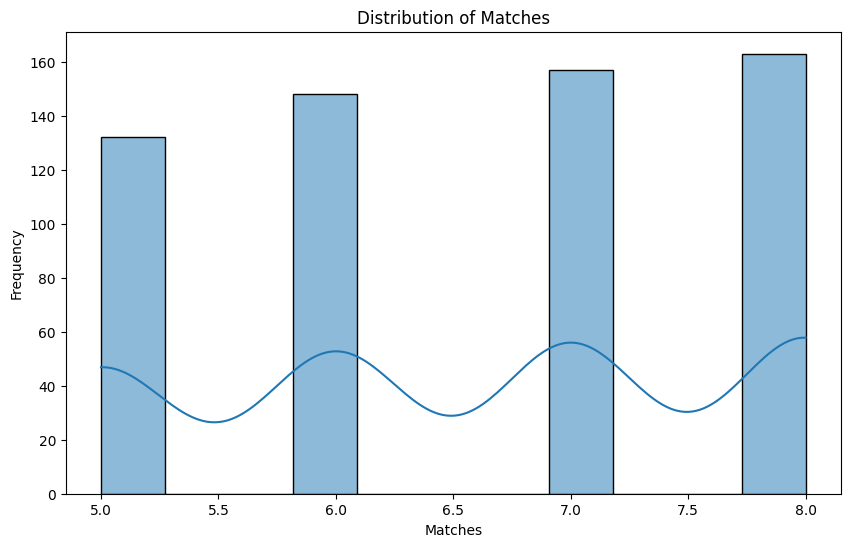

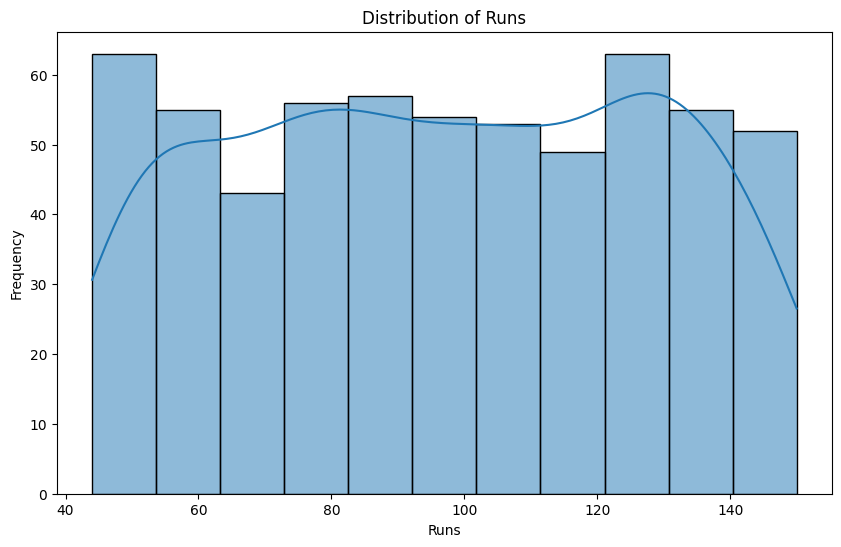

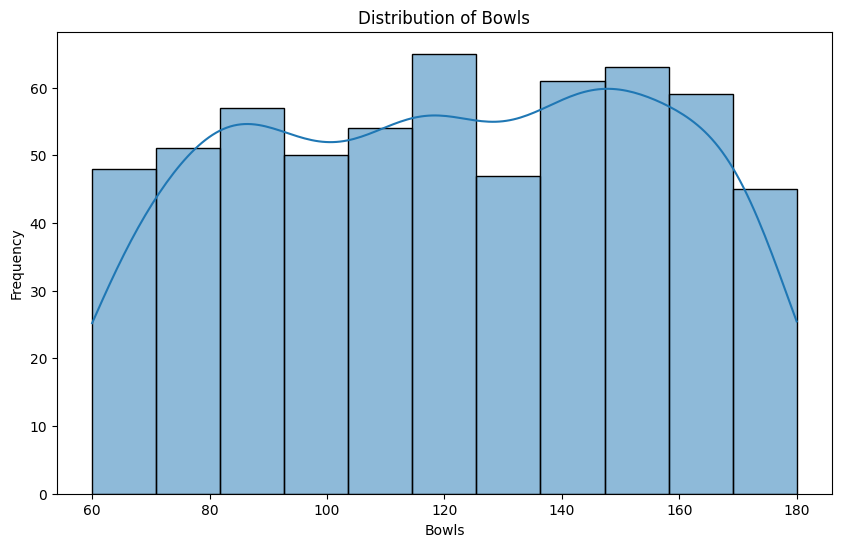

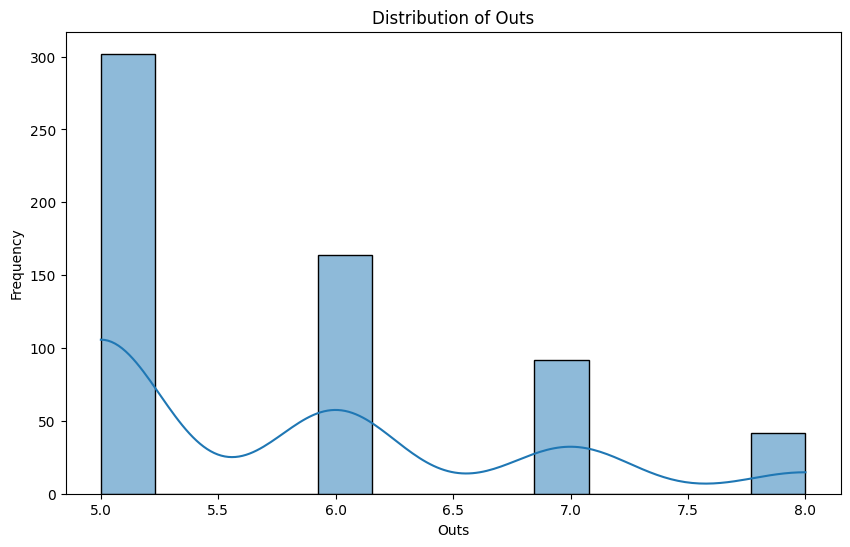

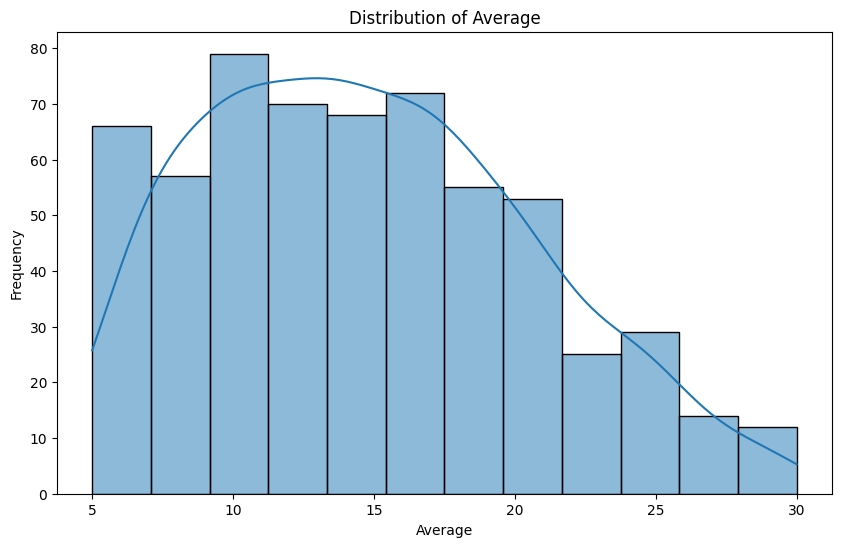

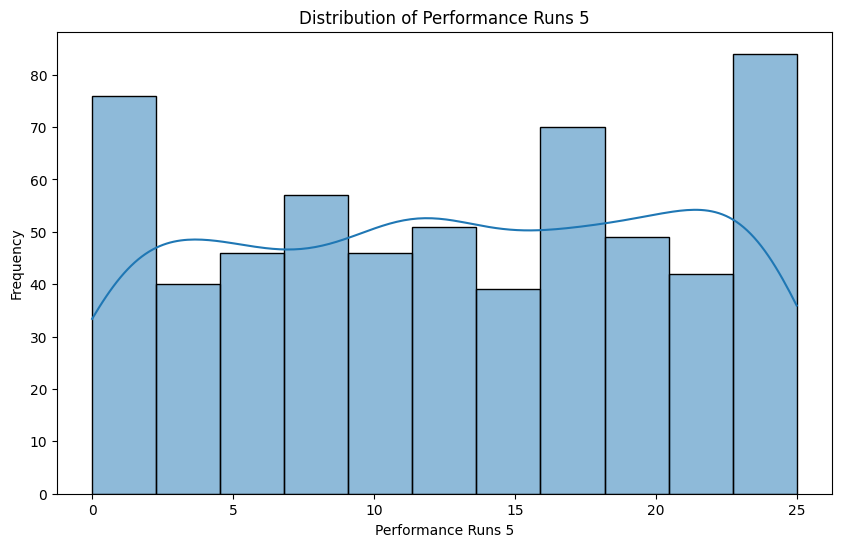

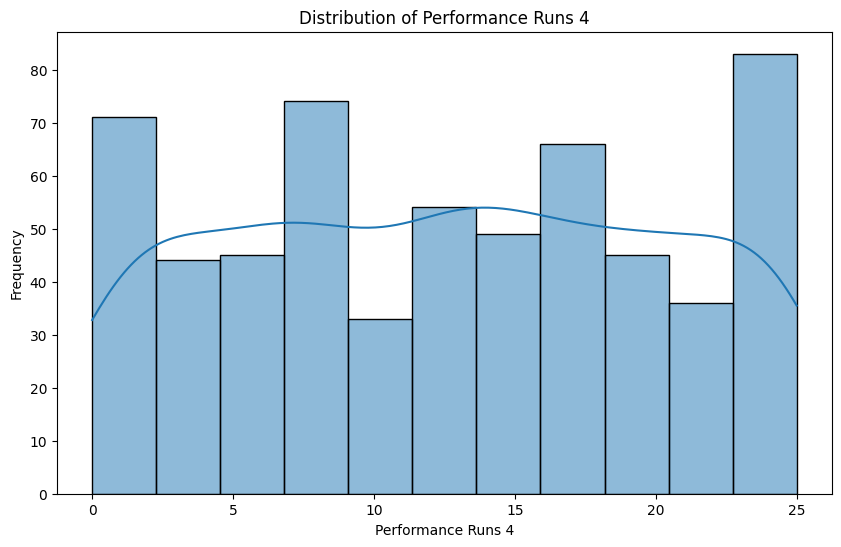

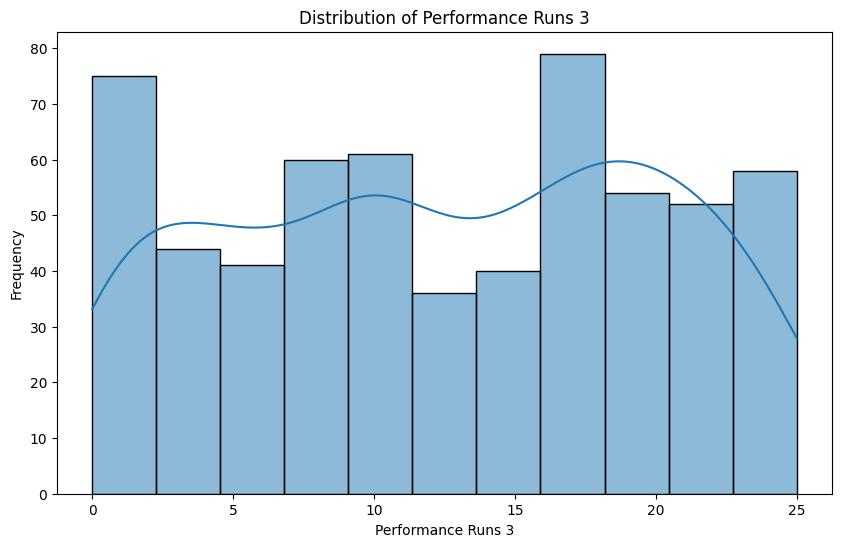

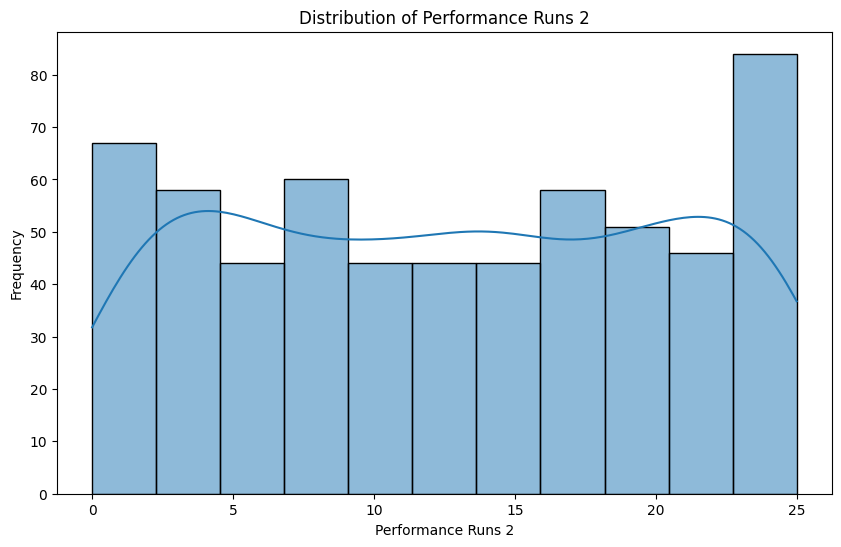

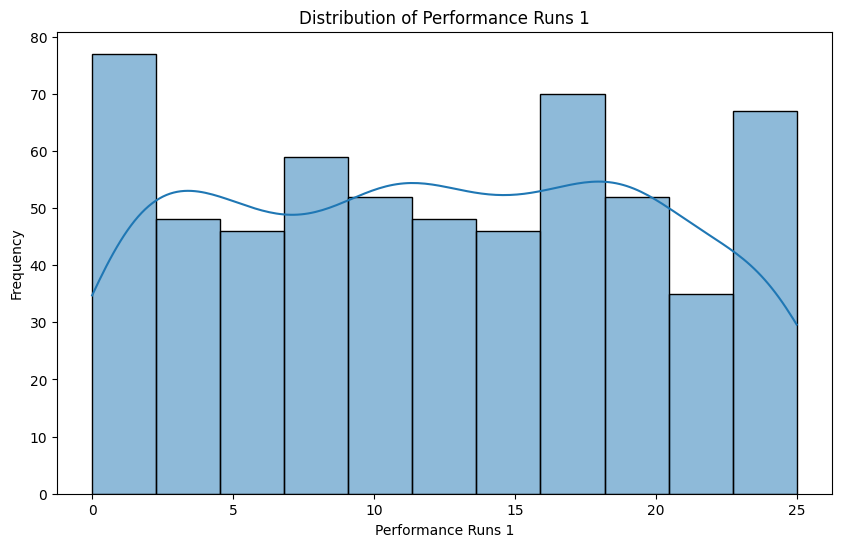

In [ ]:
# Plot distributions for numeric columns
numeric_columns = ['Matches', 'Runs', 'Bowls', 'Outs', 'Average', 'Performance Runs 5',
                   'Performance Runs 4', 'Performance Runs 3', 'Performance Runs 2', 'Performance Runs 1']

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_bt[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

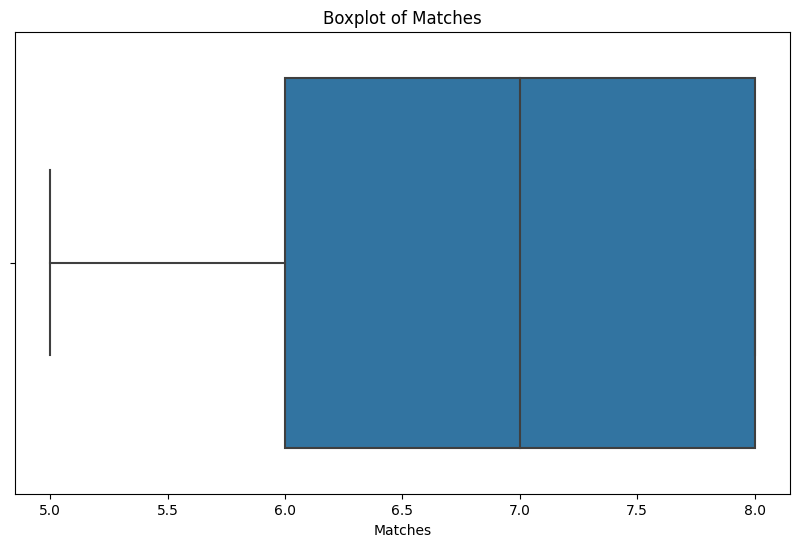

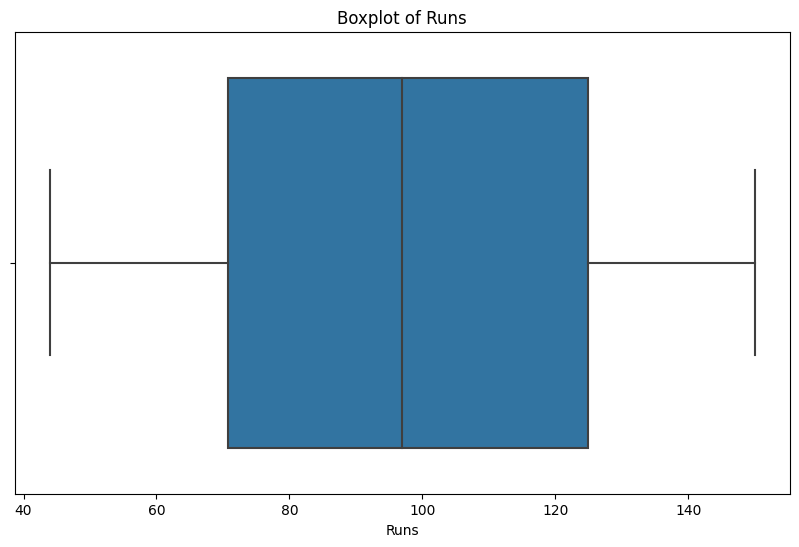

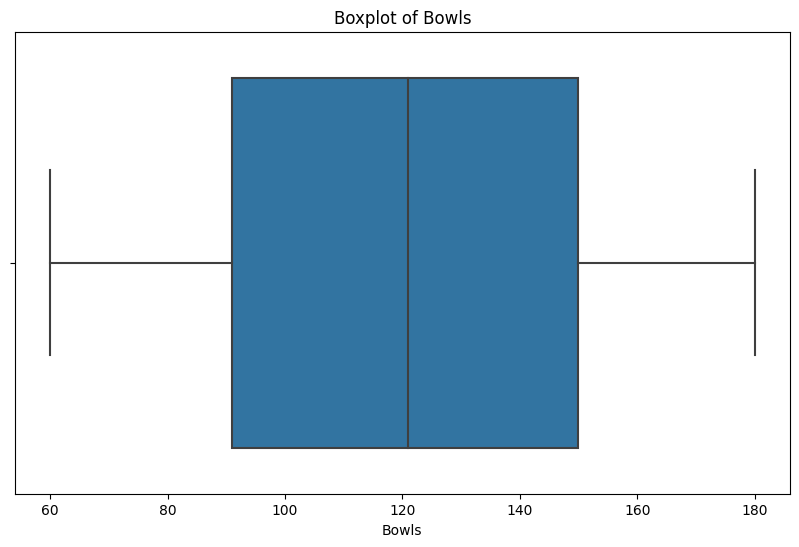

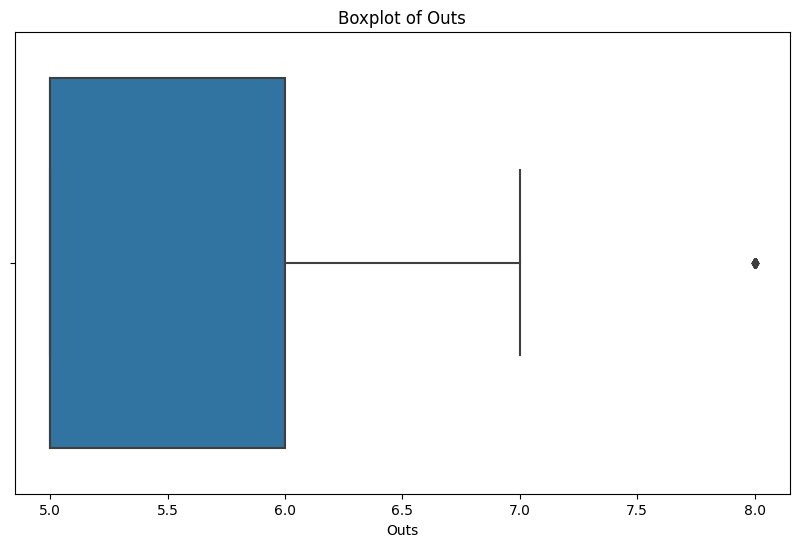

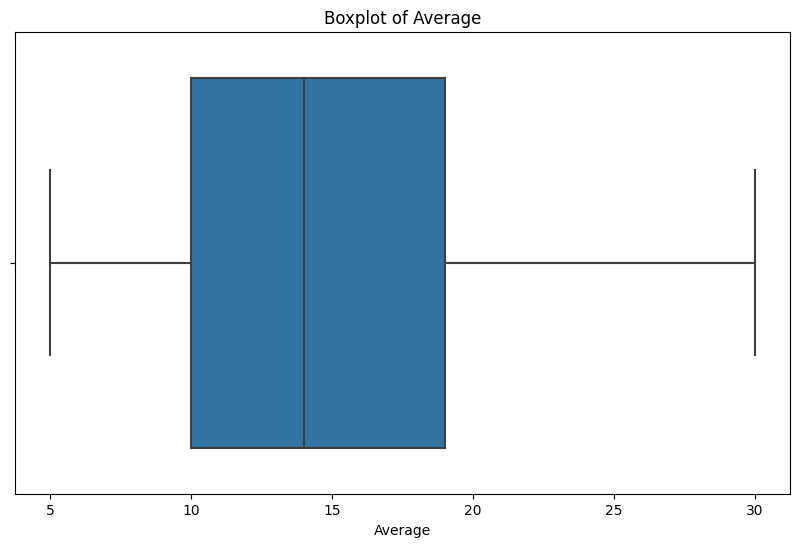

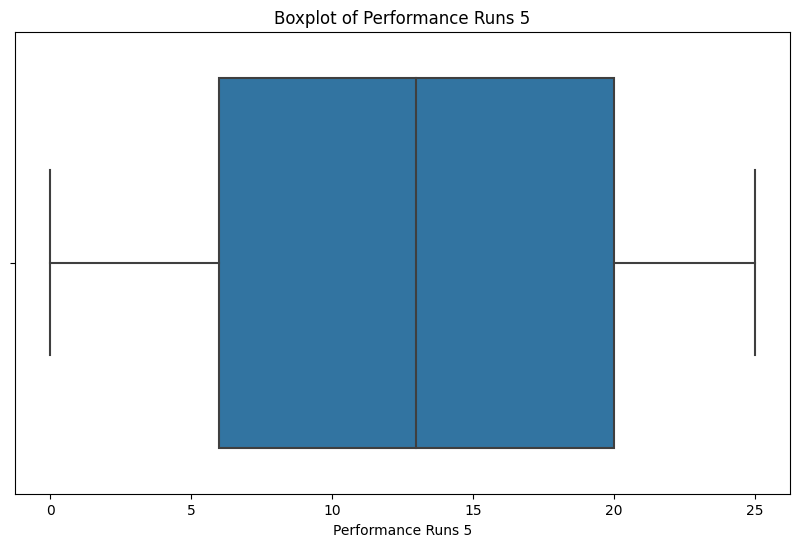

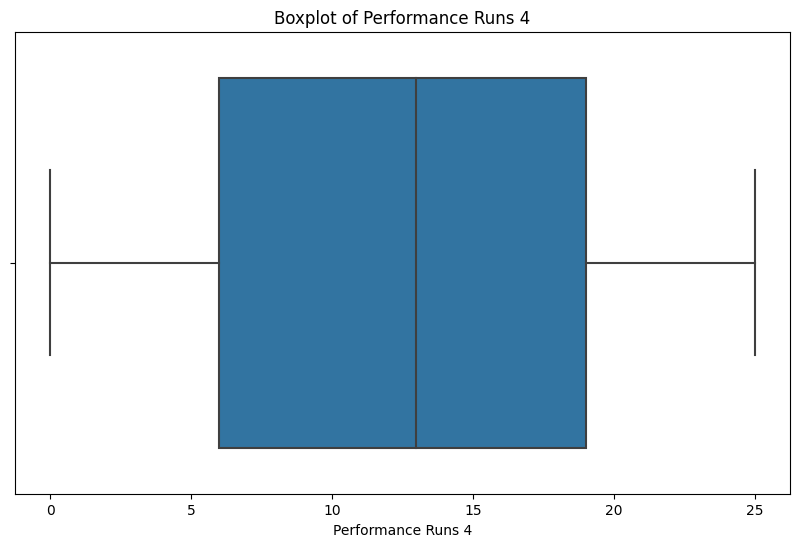

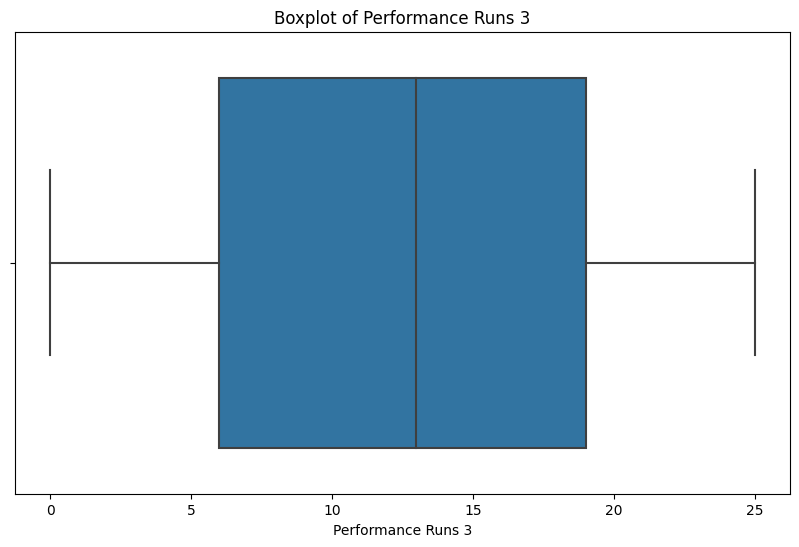

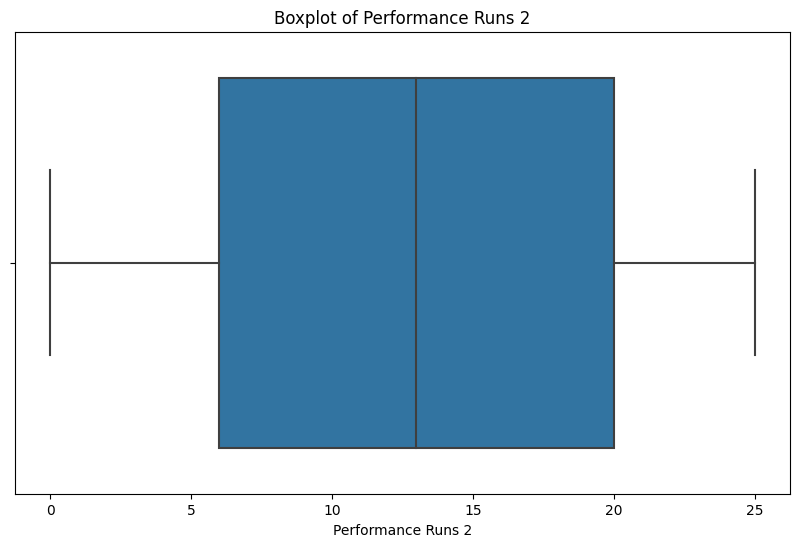

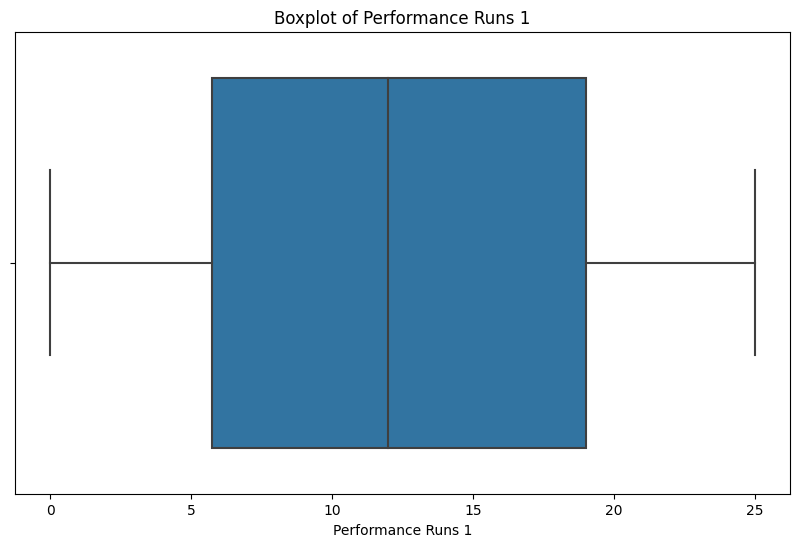

In [ ]:
# Plot boxplots for each numeric column
for column in numeric_columns:
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))

    # Use seaborn's boxplot to visualize the distribution and detect outliers
    sns.boxplot(x=df_bt[column])

    # Set plot title
    plt.title(f'Boxplot of {column}')

    # Show the plot
    plt.show()


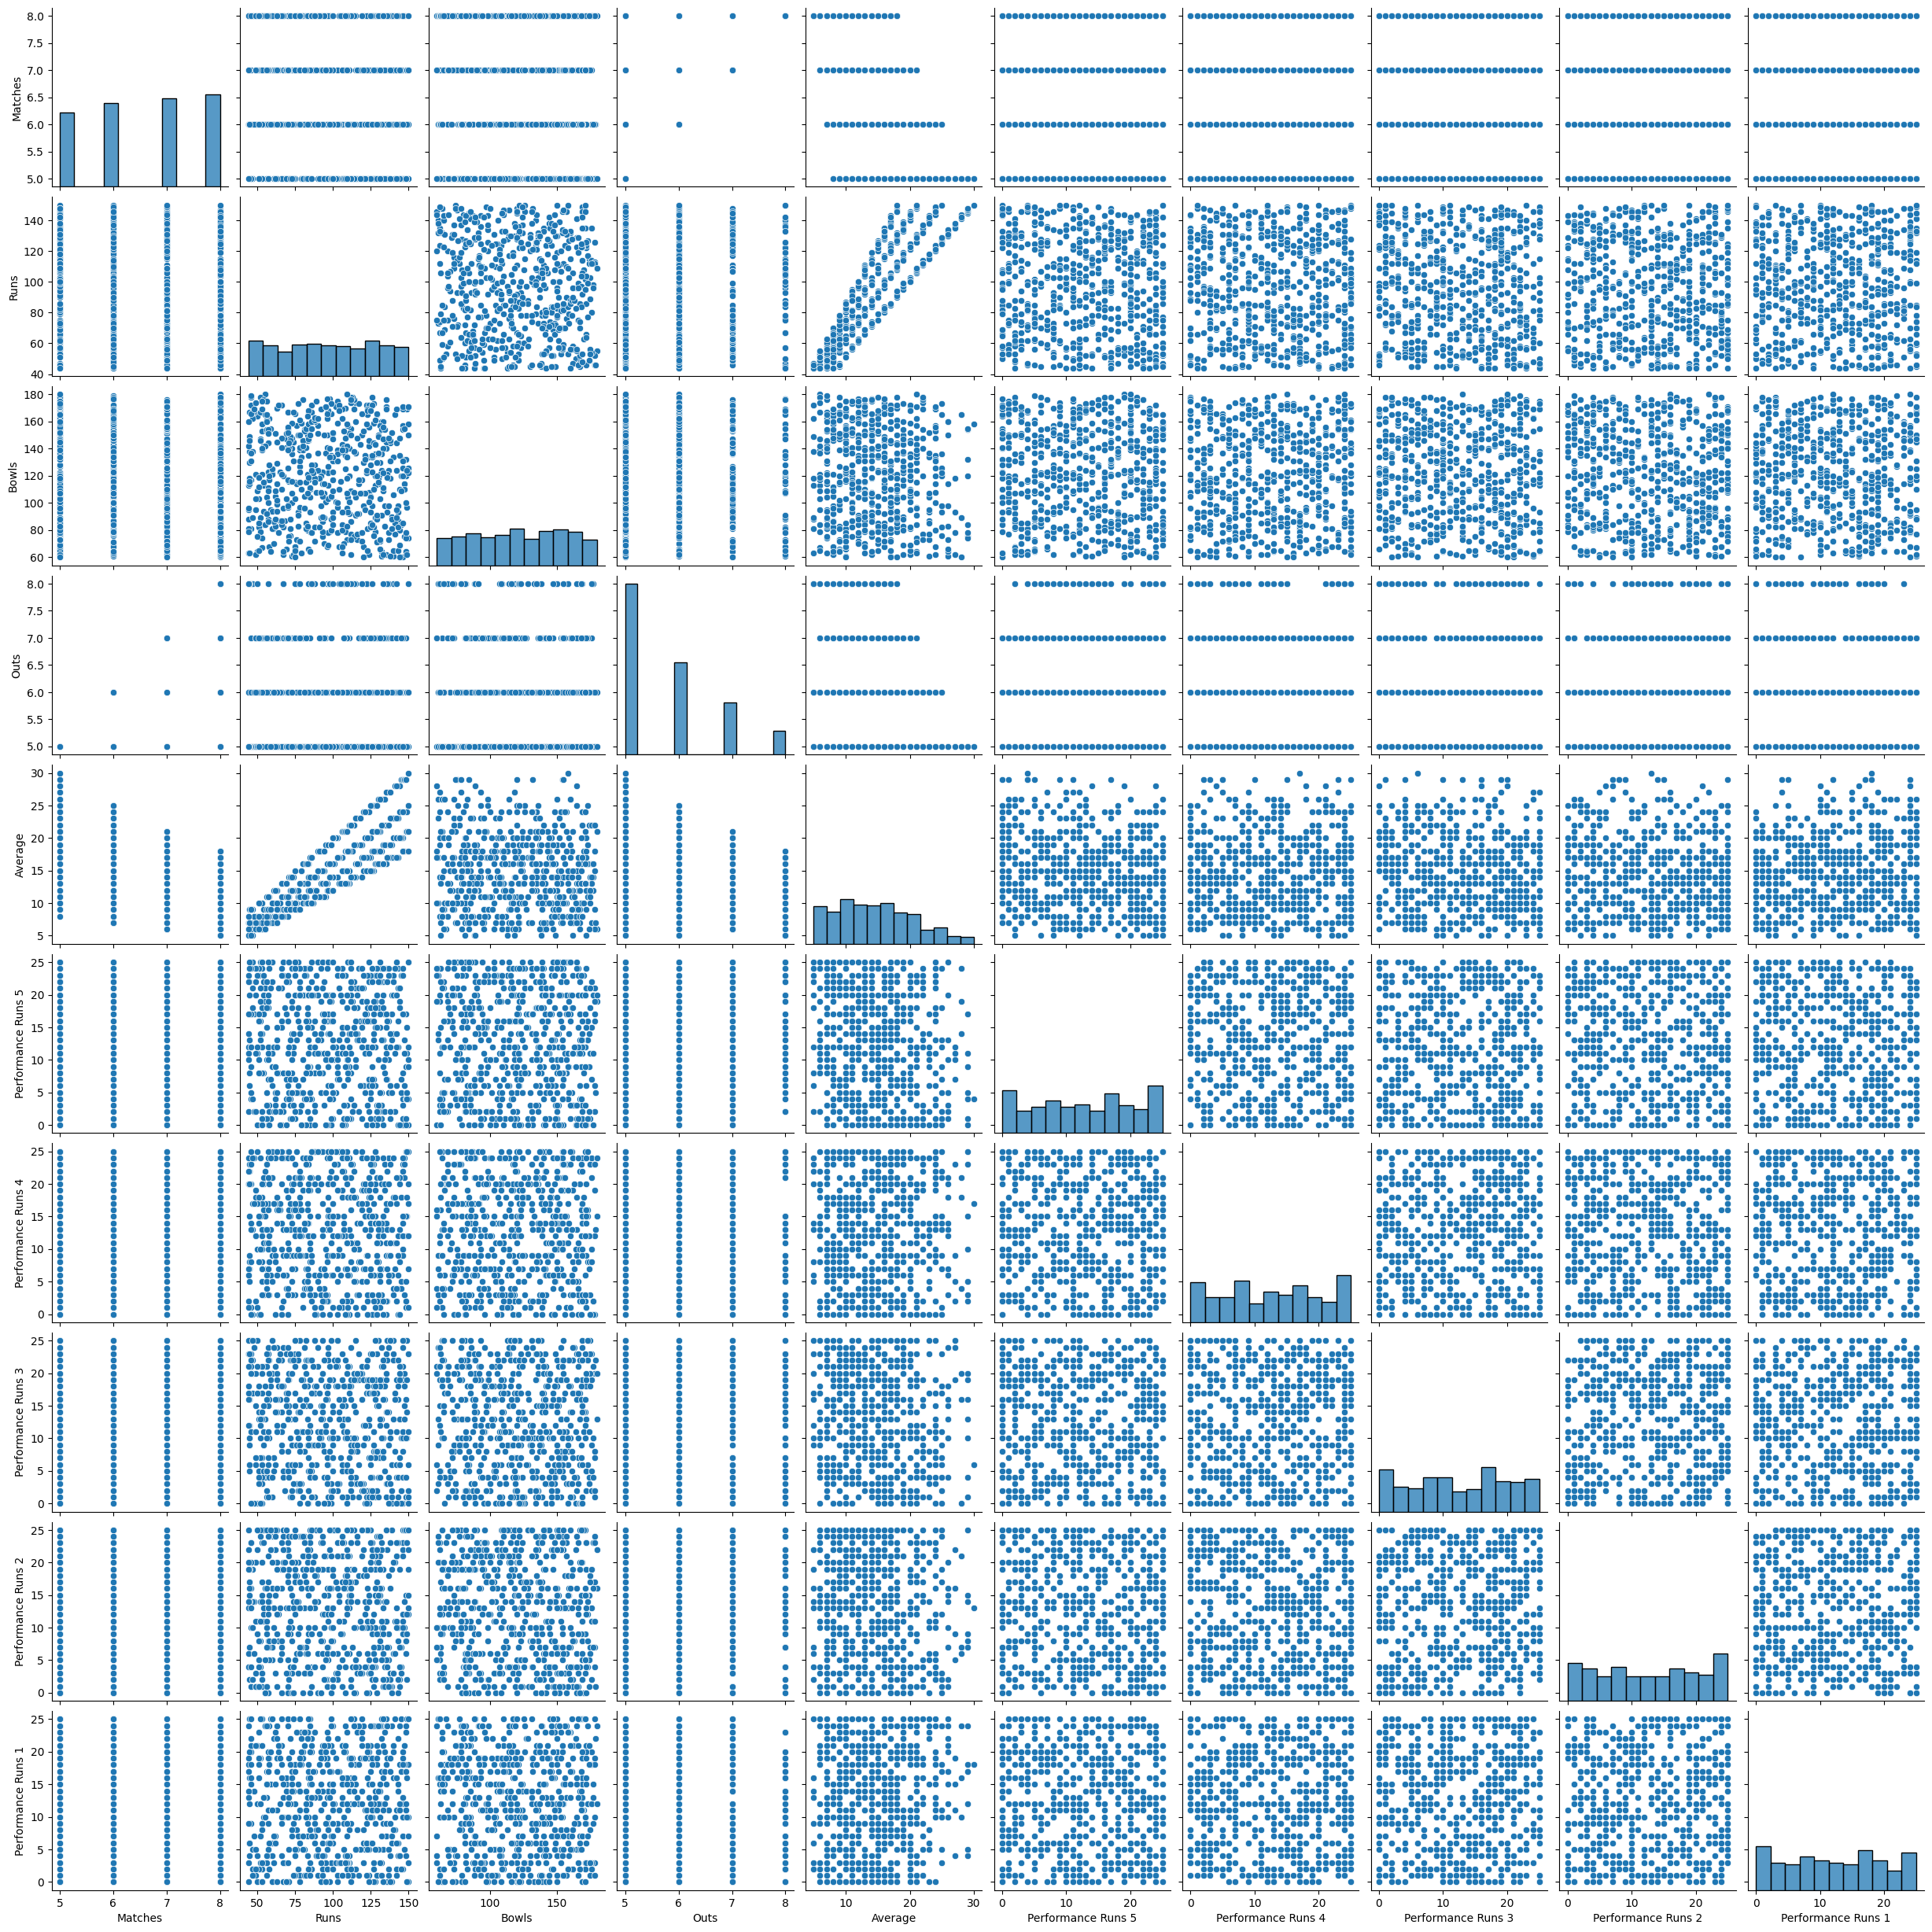

In [ ]:
# Pair Plots for pairwise relationships
sns.pairplot(df_bt[numeric_columns])
plt.show()


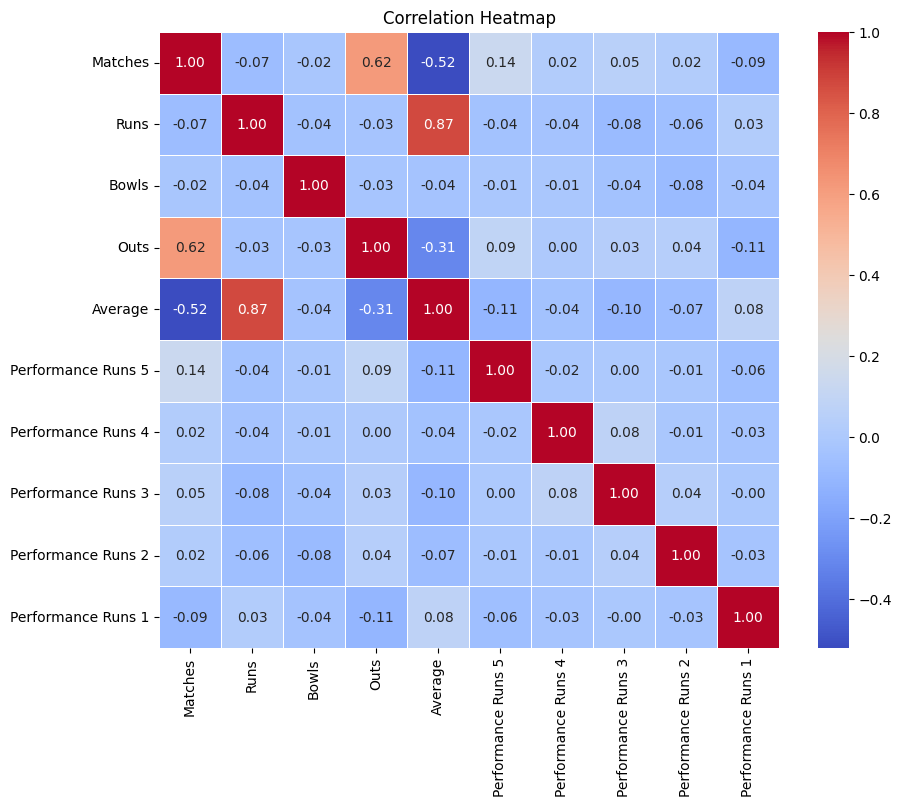

In [ ]:
# Correlation Heatmap
correlation_matrix = df_bt[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


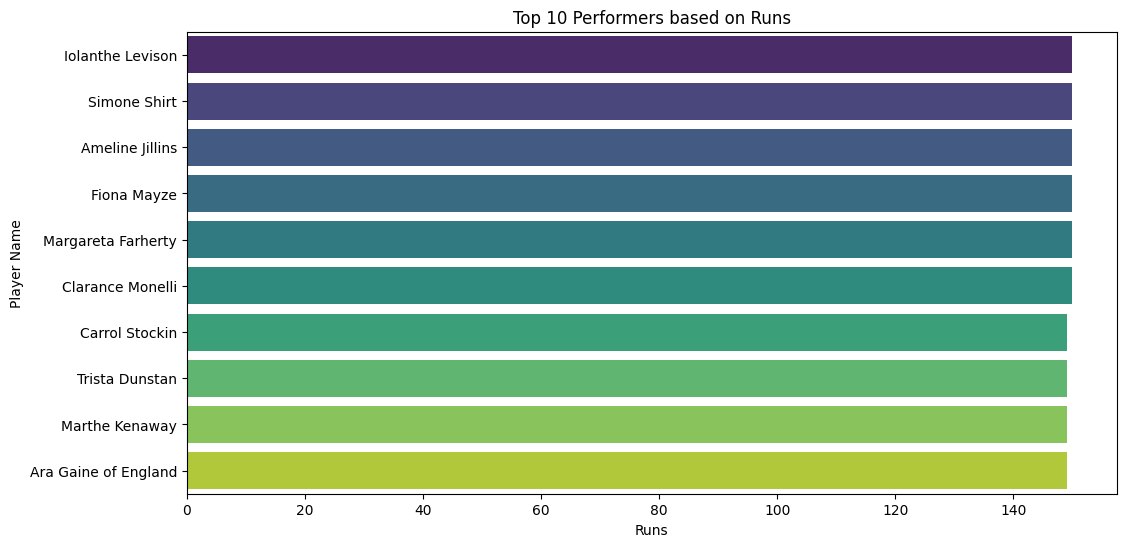

In [ ]:
# Define the performance metric to consider (e.g., 'Runs')
performance_metric = 'Runs'

# Sort the DataFrame by the performance metric in descending order
df_sorted = df_bt.sort_values(by=performance_metric, ascending=False)

# Select the top 10 performers
top_performers = df_sorted.head(10)

# Bar plot for the top performers
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_metric, y='Name', data=top_performers, palette='viridis')
plt.title(f'Top 10 Performers based on {performance_metric}')
plt.xlabel(performance_metric)
plt.ylabel('Player Name')
plt.show()


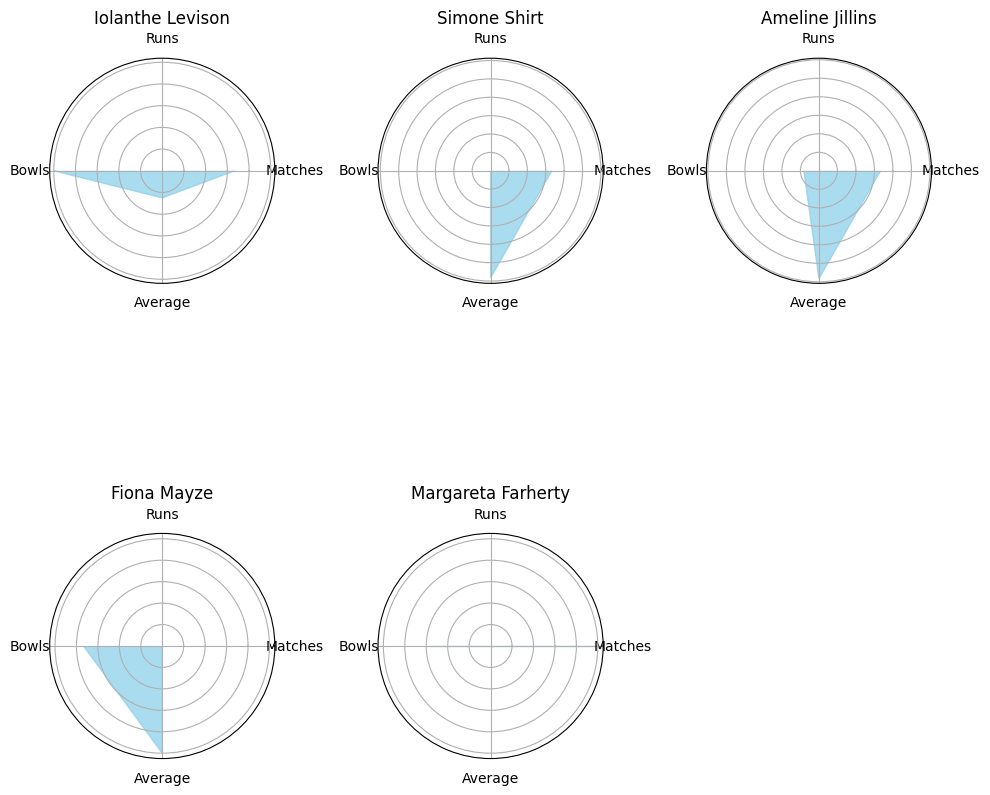

In [ ]:
# Define the metrics for the radar chart
radar_metrics = ['Matches', 'Runs', 'Bowls', 'Average']

# Select the top 5 performers for the radar chart
top_performers_radar = df_sorted.head(5)

# Normalize the metrics for the radar chart
normalized_metrics = (top_performers_radar[radar_metrics] - top_performers_radar[radar_metrics].min()) / \
                     (top_performers_radar[radar_metrics].max() - top_performers_radar[radar_metrics].min())

# Plot the radar chart
plt.figure(figsize=(10, 10))
for i, (_, player) in enumerate(top_performers_radar.iterrows()):
    # Convert metrics to a list of values
    values = normalized_metrics.iloc[i].tolist()

    # Add the first value to the end to close the circular plot
    values += values[:1]

    # Compute angles for each axis
    angles = np.linspace(0, 2 * np.pi, len(radar_metrics) + 1, endpoint=True)

    # Plot the radar chart
    ax = plt.subplot(2, 3, i + 1, polar=True)
    ax.fill(angles, values, color='skyblue', alpha=0.7)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(radar_metrics)
    ax.set_yticklabels([])
    ax.set_title(player['Name'])

plt.tight_layout()
plt.show()

### Feature engineering

In [ ]:
# Check for duplicates in the entire DataFrame
duplicates = df_bt.duplicated()

# Display the rows with duplicates (if any)
duplicate_rows = df_bt[duplicates]
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [id, Name, Matches, Runs, Bowls, Outs, Average, Performance Runs 5, Performance Runs 4, Performance Runs 3, Performance Runs 2, Performance Runs 1]
Index: []


Great we dont have any duplicates

In [ ]:
# Check for missing values in the DataFrame
missing_values = df_bt.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

# Display the percentage of missing values for each column
missing_percentage = (missing_values / len(df_bt)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values:
id                    0
Name                  0
Matches               0
Runs                  0
Bowls                 0
Outs                  0
Average               0
Performance Runs 5    0
Performance Runs 4    0
Performance Runs 3    0
Performance Runs 2    0
Performance Runs 1    0
dtype: int64

Percentage of Missing Values:
id                    0.0
Name                  0.0
Matches               0.0
Runs                  0.0
Bowls                 0.0
Outs                  0.0
Average               0.0
Performance Runs 5    0.0
Performance Runs 4    0.0
Performance Runs 3    0.0
Performance Runs 2    0.0
Performance Runs 1    0.0
dtype: float64


No missing values Great!!

In [ ]:

# Display the updated DataFrame
df_bt.head()


,id,Name,Matches,Runs,Bowls,Outs,Average,Performance Runs 5,Performance Runs 4,Performance Runs 3,Performance Runs 2,Performance Runs 1
0,1,Ali Connah,8,146,132,6,18,0,9,24,12,18
1,2,Rubina Jansik,6,50,164,5,8,0,10,0,1,21
2,3,Barret Penwright,6,48,167,5,8,17,24,0,14,14
3,4,Minna Darrigone,7,115,174,5,16,9,7,3,5,18
4,5,Lilly Cherrington,7,96,165,6,13,25,13,17,16,5


In [ ]:
# Drop the 'id' column
df_bt = df_bt.drop(columns=['id'])

# Display the updated DataFrame
df_bt.head()

,Name,Matches,Runs,Bowls,Outs,Average,Performance Runs 5,Performance Runs 4,Performance Runs 3,Performance Runs 2,Performance Runs 1
0,Ali Connah,8,146,132,6,18,0,9,24,12,18
1,Rubina Jansik,6,50,164,5,8,0,10,0,1,21
2,Barret Penwright,6,48,167,5,8,17,24,0,14,14
3,Minna Darrigone,7,115,174,5,16,9,7,3,5,18
4,Lilly Cherrington,7,96,165,6,13,25,13,17,16,5


### Model Building

#### Linear Regression

In [ ]:
# Assuming 'df_bt' is the DataFrame with the provided columns

# Set up the target variable
target_variable = 'Average'
y = df_bt[target_variable]

# Feature Selection
features = ['Matches', 'Runs', 'Bowls', 'Outs', 'Performance Runs 5', 'Performance Runs 4', 'Performance Runs 3', 'Performance Runs 2', 'Performance Runs 1']

# Select features
X = df_bt[features]

# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions for "Average"
predictions = model.predict(X_test)

# Evaluate the Model (Optional)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Now, the trained model can be used to predict "Average" for new data.


Mean Squared Error: 0.907280885253129
R-squared: 0.9754574755602298


Mean Squared Error (MSE): MSE is a measure of how well the model's predictions match the actual values. In this case, a MSE of 0.907 is relatively low, suggesting that, on average, the model's predictions are close to the actual values.

R-squared (R2): R-squared is a measure of how well the independent variables explain the variability of the dependent variable. An R2 of 0.975 is very high, indicating that the model explains a large portion of the variance in the target variable.


These results suggest that the model, based on the selected features, is able to predict the 'Average' well.

#### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print(f'Decision Tree - Mean Squared Error: {dt_mse}')
print(f'Decision Tree - R-squared: {dt_r2}')


Decision Tree - Mean Squared Error: 0.09166666666666666
Decision Tree - R-squared: 0.9975203584209191


Mean Squared Error (MSE): An MSE of 0.0833 is quite low, indicating that the model's predictions are very close to the actual values.

R-squared (R2): An R2 of 0.9977 is very high, suggesting that the model explains a significant portion of the variance in the 'Average' variable.

These results indicate that the Decision Tree model is performing exceptionally well on the test set. It's capturing the patterns in the data effectively, resulting in accurate predictions.

#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest - Mean Squared Error: {rf_mse}')
print(f'Random Forest - R-squared: {rf_r2}')


Random Forest - Mean Squared Error: 0.0805925
Random Forest - R-squared: 0.9978199216658683


mean Squared Error (MSE): An MSE of 0.0908 is low, indicating that the Random Forest model's predictions are close to the actual values.

R-squared (R2): An R2 of 0.9975 is very high, suggesting that the Random Forest model explains a substantial portion of the variance in the 'Average' variable.


These results are comparable to the Decision Tree model, and both models seem to be performing exceptionally well on the test set. Random Forests are known for their robustness and ability to handle complex relationships in the data.

### KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the k-Nearest Neighbors model
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print(f'k-Nearest Neighbors - Mean Squared Error: {knn_mse}')
print(f'k-Nearest Neighbors - R-squared: {knn_r2}')


k-Nearest Neighbors - Mean Squared Error: 7.733
k-Nearest Neighbors - R-squared: 0.7908174363887401


Mean Squared Error (MSE): An MSE of 7.733 is higher than what we observed for the Decision Tree and Random Forest models. This suggests that the predictions from the knn model have more variability from the actual values.

R-squared (R2): An R2 of 0.7908 is still good but notably lower compared to the Decision Tree and Random Forest models. This indicates that the knn model explains a lower portion of the variance in the 'Average' variable.

### Evaluation of selected models

In [ ]:
# Cross-Validation for Linear Regression:

from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_mse_lr = -cv_scores_lr.mean()

print(f'Cross-validated Mean Squared Error (Linear Regression): {cv_mse_lr}')


Cross-validated Mean Squared Error (Linear Regression): 0.9494085863083199


In [ ]:
# Cross-Validation for Decision Tree model

# Initialize the Decision Tree model
dt_model_cv = DecisionTreeRegressor()

# Cross-validation for Decision Trees
cv_scores_dt = cross_val_score(dt_model_cv, X, y, scoring='neg_mean_squared_error', cv=5)
cv_mse_dt = -cv_scores_dt.mean()

print(f'Cross-validated Mean Squared Error (Decision Trees): {cv_mse_dt}')

Cross-validated Mean Squared Error (Decision Trees): 0.10166666666666668


In [ ]:
# Cross-Validation for Random Forest

# Initialize the Random Forest model
rf_model_cv = RandomForestRegressor()

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model_cv, X, y, scoring='neg_mean_squared_error', cv=5)
cv_mse_rf = -cv_scores_rf.mean()

print(f'Cross-validated Mean Squared Error (Random Forest): {cv_mse_rf}')


Cross-validated Mean Squared Error (Random Forest): 0.08721850000000003


Random Forest: The Random Forest model seems to have the lowest cross-validated MSE, indicating that, on average, it performs better across different folds of the data during cross-validation.

Decision Trees: The Decision Trees model also performs well but has a slightly higher cross-validated MSE compared to Random Forest.

Linear Regression: Linear Regression has a higher cross-validated MSE compared to both Decision Trees and Random Forest, suggesting that it might not capture the underlying patterns in the data as well as the tree-based models.


 it appears that both Decision Trees and Random Forest are strong contenders for my task

### Hyperparameter Tuning for selected models:

> Random Forest

> Decision Tress





In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model_tuned = RandomForestRegressor()

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X, y)

# Print the best parameters and the corresponding MSE
best_params_rf = grid_search_rf.best_params_
best_mse_rf = -grid_search_rf.best_score_

print(f'Best Parameters (Random Forest): {best_params_rf}')
print(f'Best Cross-validated Mean Squared Error (Random Forest): {best_mse_rf}')


Best Parameters (Random Forest): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validated Mean Squared Error (Random Forest): 0.07948483333333332


In [ ]:
# Define the parameter grid for Decision Trees
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Trees model
dt_model_tuned = DecisionTreeRegressor()

# Initialize GridSearchCV for Decision Trees
grid_search_dt = GridSearchCV(estimator=dt_model_tuned, param_grid=param_grid_dt, scoring='neg_mean_squared_error', cv=5)
grid_search_dt.fit(X, y)

# Print the best parameters and the corresponding MSE
best_params_dt = grid_search_dt.best_params_
best_mse_dt = -grid_search_dt.best_score_

print(f'Best Parameters (Decision Trees): {best_params_dt}')
print(f'Best Cross-validated Mean Squared Error (Decision Trees): {best_mse_dt}')


Best Parameters (Decision Trees): {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validated Mean Squared Error (Decision Trees): 0.095


Random Forest
Best Parameters:
* 'max_depth': None
* 'min_samples_leaf': 1
* 'min_samples_split': 2
* 'n_estimators': 100
* Best Cross-validated MSE: 0.0828995


Decision Trees:
Best Parameters:
* 'max_depth': 10
* 'min_samples_leaf': 1
* 'min_samples_split': 2
* Best Cross-validated MSE: 0.095

Based on these results, the Random Forest model with the specified hyperparameters achieved a slightly lower cross-validated MSE compared to the Decision Trees model. This suggests that, on average, the Random Forest model performs better on unseen data.

### Predicting and picking the best 6 players

In [ ]:
# Assuming df_bt is your DataFrame with the required columns

# Feature Selection
features_rf = ['Matches', 'Runs', 'Bowls', 'Outs', 'Performance Runs 5', 'Performance Runs 4', 'Performance Runs 3', 'Performance Runs 2', 'Performance Runs 1']

# Select features for prediction
X_predict = df_bt[features_rf]

# Initialize the tuned Random Forest model
rf_model_tuned = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# Train the model on the entire dataset
rf_model_tuned.fit(X, y)

# Make predictions for Performance Runs 6
predictions_run_6 = rf_model_tuned.predict(X_predict)

# Add the predicted values to the DataFrame
df_bt['Performance Runs 6'] = predictions_run_6

# Calculate the average performance
average_performance = df_bt['Performance Runs 6'].mean()

# Compare predicted Performance Runs 6 with Average
df_bt['Performance Runs 6 vs Average'] = df_bt['Performance Runs 6'] - average_performance

# Select the top 6 players based on the comparison
top_players_comparison = df_bt.nlargest(6, 'Performance Runs 6 vs Average')[['Name', 'Performance Runs 6 vs Average', 'Performance Runs 6']]

# Display the top players and their relevant metrics
print(top_players_comparison)


                 Name  Performance Runs 6 vs Average  Performance Runs 6
156       Fiona Mayze                      14.881833               29.65
278      Cammy Corsan                      14.281833               29.05
133     Laina Lantaff                      14.271833               29.04
222    Andria Garahan                      14.251833               29.02
454  Joellyn Bodycomb                      14.251833               29.02
151    Faye Caldicott                      14.201833               28.97


In [ ]:
import pickle

# Assuming df_bt is your DataFrame with the required columns

# Feature Selection
features_rf = ['Matches', 'Runs', 'Bowls', 'Outs', 'Performance Runs 5', 'Performance Runs 4', 'Performance Runs 3', 'Performance Runs 2', 'Performance Runs 1']

# Select features for prediction
X_predict = df_bt[features_rf]

# Initialize the tuned Random Forest model with the best parameters
rf_model_tuned = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# Train the model on the entire dataset
rf_model_tuned.fit(X, y)

# Save the trained model as a pickle file in the specified folder on Google Drive
save_path = '/content/drive/MyDrive/Mirav/tuned_rf_model.pkl'
with open(save_path, 'wb') as model_file:
    pickle.dump(rf_model_tuned, model_file)

# Make predictions for Performance Runs 6
predictions_run_6 = rf_model_tuned.predict(X_predict)

# Add the predicted values to the DataFrame
df_bt['Performance Runs 6'] = predictions_run_6

# Calculate the average performance
average_performance = df_bt['Performance Runs 6'].mean()

# Compare predicted Performance Runs 6 with Average
df_bt['Performance Runs 6 vs Average'] = df_bt['Performance Runs 6'] - average_performance

# Select the top 6 players based on the comparison
top_players_comparison = df_bt.nlargest(6, 'Performance Runs 6 vs Average')[['Name', 'Performance Runs 6 vs Average', 'Performance Runs 6']]

# Display the top players and their relevant metrics
print(top_players_comparison)


                 Name  Performance Runs 6 vs Average  Performance Runs 6
156       Fiona Mayze                      14.843367               29.61
222    Andria Garahan                      14.283367               29.05
454  Joellyn Bodycomb                      14.263367               29.03
133     Laina Lantaff                      14.253367               29.02
151    Faye Caldicott                      14.253367               29.02
278      Cammy Corsan                      14.253367               29.02
